<center><h3 style="color:red;">Sentiment analysis system</h3></center>

**Objectives:**

- The goal of this assignment is to build a sentiment analysis system using the Bag of Words (BoW) and TF-IDF techniques. Students will preprocess the dataset, clean and tokenize text using regular expressions (regex) in Python, and apply at least three machine learning models to classify the sentiment of given text data. Finally, they will evaluate and compare model performances to determine the best-performing model.

**1. Data Preprocessing & Cleaning**

In [1]:
import pandas as pd

dataset = pd.read_csv("./Data/Dataset.csv")
dataset.head()

,text,sentiment
0,NaN,0
1,Horrible!!! The worst experience ever. Do not ...,0
2,Terrible service!! I won't buy from here again...,0
3,"I had high hopes, but it broke after a week. :-/",0
4,"Product is okay, but packaging was awful. ?!?",0


In [2]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       980 non-null    object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


In [3]:
print(dataset.isnull().sum())

text         20
sentiment     0
dtype: int64


In [4]:
# Drop rows with missing values in the 'text' or 'sentiment' columns
dataset.dropna(subset = ["text", "sentiment"], inplace = True)

# Reset the index after dropping rows
dataset.reset_index(drop = True, inplace = True)
dataset.head()

,text,sentiment
0,Horrible!!! The worst experience ever. Do not ...,0
1,Terrible service!! I won't buy from here again...,0
2,"I had high hopes, but it broke after a week. :-/",0
3,"Product is okay, but packaging was awful. ?!?",0
4,"Good quality, but a bit expensive. Worth it th...",0


*Checking for Unique and Duplicate Text Entries*

In [5]:
#Count the number of unique text in the dataset
unique_text_count = dataset["text"].nunique()
print(f"Number of unique text entries: {unique_text_count}")

# Count the number of duplicates text in the dataset
duplicates_count = dataset["text"].duplicated().sum()
print(f"Number of duplicate text entries: {duplicates_count}")

Number of unique text entries: 20
Number of duplicate text entries: 960


In [6]:
# #Drop duplicates
# dataset.drop_duplicates(subset = ['text'], inplace = True)
# # Reset the index after dropping duplicates
# dataset.reset_index(drop = True, inplace = True)
# dataset.info()

**Preprocessing: Defining a Text Cleaning Function**

In [7]:
import re

def clean_text(text):

    # Remove non-alphabetic characters and ASCII codes
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [8]:
# Apply the cleaning function to the "text" column
dataset["text"] = dataset["text"].apply(clean_text)
dataset.head()

,text,sentiment
0,Horrible The worst experience ever Do not buy,0
1,Terrible service I wont buy from here again,0
2,I had high hopes but it broke after a week,0
3,Product is okay but packaging was awful,0
4,Good quality but a bit expensive Worth it though,0


*Converting the text to lowercase*

In [9]:
dataset["text"] = dataset["text"].str.lower()
dataset.head()

,text,sentiment
0,horrible the worst experience ever do not buy,0
1,terrible service i wont buy from here again,0
2,i had high hopes but it broke after a week,0
3,product is okay but packaging was awful,0
4,good quality but a bit expensive worth it though,0


**Downloading and Importing NLTK Stopwords**

In [10]:
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Defining a Function to Remove Stopwords**

In [11]:
# Get English stopwords
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

**Applying Stopword Removal to the Dataset**

In [12]:
# Apply the stopwords removal function
dataset["text"] = dataset["text"].apply(remove_stopwords)
dataset.head()

,text,sentiment
0,horrible worst experience ever buy,0
1,terrible service wont buy,0
2,high hopes broke week,0
3,product okay packaging awful,0
4,good quality bit expensive worth though,0


**Downloading WordNet**

In [13]:
from nltk.stem import WordNetLemmatizer

# Download WordNet if not already downloaded
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Defining a Lemmatization Function with NLTK WordNet**

In [14]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [15]:
# Apply the lemmatization function
dataset["text"] = dataset["text"].apply(lemmatize_text)

dataset.head()

,text,sentiment
0,horrible worst experience ever buy,0
1,terrible service wont buy,0
2,high hope broke week,0
3,product okay packaging awful,0
4,good quality bit expensive worth though,0


**Summary of Preprocessing Steps**

- Handled Missing Values: Dropped rows with missing values in the text or sentiment columns to ensure data quality.

- Removed Non-Alphabetic Characters: Used regex to remove special characters, ASCII codes, and extra spaces.

- Converted Text to Lowercase: Ensured uniformity in the text data.

- Removed Stopwords: Eliminated common words that do not contribute to sentiment analysis.

- Performed Lemmatization: Normalized words to their base forms for consistency.

### Implement bag of words and TF-IDF.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# Initialize CountVectorizer
bow_vectorizer = CountVectorizer()

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

*Extracting Bag-of-Words (BoW) Features*

In [18]:
# Fit and transform the text data
X_bow = bow_vectorizer.fit_transform(dataset["text"])
print(f"Shape of the bag of words matrix: {X_bow.shape}")

Shape of the bag of words matrix: (980, 76)


*Extracting TF-IDF Features*

In [19]:
# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(dataset["text"])
print(f"Shape of the TF-IDF matrix: {X_tfidf.shape}")

Shape of the TF-IDF matrix: (980, 76)


**Converting the Bag-of-Words Matrix to a Pandas DataFrame**

In [20]:
# Convert the Bag of word matrix to a DataFrame
df_bow = pd.DataFrame(X_bow.toarray(), columns = bow_vectorizer.get_feature_names_out())
df_bow.head()

,absolutely,advertised,amazing,arrived,away,awful,best,better,bit,broke,...,time,took,trust,week,wont,work,worst,worth,worthit,would
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


**Converting the TF-IDF Matrix to a Pandas DataFrame**

In [21]:
# Convert the TF-IDF matrix to a DataFrame
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names_out())
df_tfidf.head()

,absolutely,advertised,amazing,arrived,away,awful,best,better,bit,broke,...,time,took,trust,week,wont,work,worst,worth,worthit,would
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.388662,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.474759,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.5,...,0.0,0.0,0.0,0.5,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.551071,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.432693,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.432693,0.0,0.0


| **Aspect**           | **Bag of Words (BoW)**                                              | **TF-IDF**                                                             |
|-----------------------|---------------------------------------------------------------------|-------------------------------------------------------------------------|
| **Values**           | Raw word counts (e.g., 1, 2, etc.).                                 | Weighted scores based on term frequency and inverse document frequency. |
| **Focus**            | Focuses on word frequency.                                          | Focuses on word importance in a document relative to the corpus.        |
| **Common Words**     | Common words may dominate unless stopwords are removed.             | Common words are down-weighted automatically.                           |
| **Interpretability** | Easier to interpret as it directly represents counts.               | Harder to interpret due to weighted values.                             |
| **Use Case**         | Suitable for simple models or when frequency is sufficient.         | Suitable for tasks where word relevance matters more.                   |

### Model Training and Evaluation

In [22]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split

In [23]:
# Split the data into training and testing sets
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, 
                                                                    dataset["sentiment"], 
                                                                    test_size = 0.2, 
                                                                    random_state = 42,
                                                                    shuffle = True)

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, 
                                                                            dataset["sentiment"], 
                                                                            test_size = 0.2, 
                                                                            random_state = 42,
                                                                            shuffle = True)

In [24]:
# Shapes of the Train and Test sets
print(f"Training set size (Bag of Words): {X_train_bow.shape}")
print(f"Testing set size (Bag of Words): {X_test_bow.shape}")

print(f"Training set size (TF-IDF): {X_train_tfidf.shape}")
print(f"Testing set size (TF-IDF): {X_test_tfidf.shape}")

Training set size (Bag of Words): (784, 76)
Testing set size (Bag of Words): (196, 76)
Training set size (TF-IDF): (784, 76)
Testing set size (TF-IDF): (196, 76)


Model Training

In [25]:
# Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

For Bag of Words

In [26]:
# Initialize models
model_xgb_bow = XGBClassifier(use_label_encoder = False, eval_metric = "mlogloss")

model_svm_bow = SVC(kernel = "linear", probability = True)

model_rf_bow = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [27]:
# Train models for Bag of Words
model_xgb_bow.fit(X_train_bow, y_train_bow)
model_svm_bow.fit(X_train_bow, y_train_bow)
model_rf_bow.fit(X_train_bow, y_train_bow)

c:\Users\anike\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:23:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomForestClassifier(random_state=42)

In [28]:
# Make predictions
y_pred_xgb = model_xgb_bow.predict(X_test_bow)
y_pred_svm = model_svm_bow.predict(X_test_bow)
y_pred_rf = model_rf_bow.predict(X_test_bow)

For TF-IDF vector

In [29]:
# Initialize models
model_xgb_tfidf = XGBClassifier(use_label_encoder = False, eval_metric = "mlogloss")

model_svm_tfidf = SVC(kernel = "linear", probability = True)

model_rf_tfidf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [30]:
# Train models for Bag of Words
model_xgb_tfidf.fit(X_train_tfidf, y_train_tfidf)
model_svm_tfidf.fit(X_train_tfidf, y_train_tfidf)
model_rf_tfidf.fit(X_train_tfidf, y_train_tfidf)

c:\Users\anike\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:23:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomForestClassifier(random_state=42)

In [31]:
# Make predictions
y_pred_xgb_tfidf = model_xgb_tfidf.predict(X_test_tfidf)
y_pred_svm_tfidf = model_svm_tfidf.predict(X_test_tfidf)
y_pred_rf_tfidf = model_rf_tfidf.predict(X_test_tfidf)

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
def evaluate_model(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    print(f'\nEvaluation Metrics for {name} Model:')
    print(f'{"Metric":<10} {"Score":<10}')
    print("-" * 20)
    print(f'{"Accuracy":<10} {accuracy:.4f}')
    print(f'{"Precision":<10} {precision:.4f}')
    print(f'{"Recall":<10} {recall:.4f}')
    print(f'{"F1 Score":<10} {f1:.4f}')

    # Return metrics in a dictionary for plotting later
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

In [ ]:
def plot_model_metrics(model_metrics):
    
    models = list(model_metrics.keys())
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
    
    # Prepare the data for plotting
    x = np.arange(len(metrics))  # the label locations
    width = 0.25  # the width of the bars

    # Create a figure
    plt.figure(figsize=(8, 5))
    
    # Plot each model's metrics as a separate group of bars
    for i, model in enumerate(models):
        scores = [model_metrics[model][m] for m in metrics]
        plt.bar(x + i * width, scores, width=width, label=model)
    
    # Configure the x-axis
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Comparison of Model Metrics')
    plt.xticks(x + width * (len(models) - 1) / 2, metrics)
    plt.ylim(0, 1)  # metrics typically range from 0 to 1
    plt.legend()
    plt.show()

#### Evaluation for the Bag of Words

In [42]:
print("Evaluation for the Bag of Word vectors.\n")

metrics_xgb = evaluate_model("XGBoost", y_test_bow, y_pred_xgb)
metrics_svm = evaluate_model("SVM", y_test_bow, y_pred_svm)
metrics_rf  = evaluate_model("Random Forest", y_test_bow, y_pred_rf)

# Collect them into a dictionary for plotting
model_metrics_bow = {
    "XGBoost": metrics_xgb,
    "SVM": metrics_svm,
    "Random Forest": metrics_rf
}

Evaluation for the Bag of Word vectors.


Evaluation Metrics for XGBoost Model:
Metric     Score     
--------------------
Accuracy   1.0000
Precision  1.0000
Recall     1.0000
F1 Score   1.0000

Evaluation Metrics for SVM Model:
Metric     Score     
--------------------
Accuracy   1.0000
Precision  1.0000
Recall     1.0000
F1 Score   1.0000

Evaluation Metrics for Random Forest Model:
Metric     Score     
--------------------
Accuracy   1.0000
Precision  1.0000
Recall     1.0000
F1 Score   1.0000


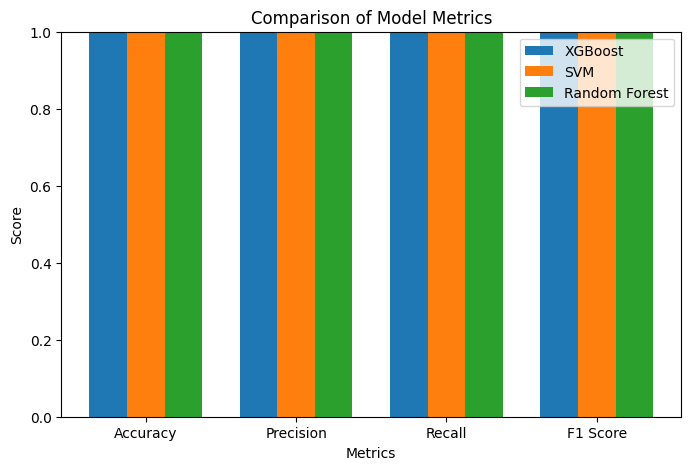

In [ ]:
plot_model_metrics(model_metrics_bow)

#### Evaluation for the TF-IDF

In [44]:
print("Evaluation for the Bag of TF-IDF vectors.\n")

xgb_tfidf_metrics = evaluate_model("XGBoost", y_test_tfidf, y_pred_xgb_tfidf)
svm_tfidf_metrics = evaluate_model("SVM", y_test_tfidf, y_pred_svm_tfidf)
rf_tfidf_metrics  = evaluate_model("Random Forest", y_test_tfidf, y_pred_rf_tfidf)

# Collect into a dictionary for plotting
model_metrics_tfidf = {
    "XGBoost": xgb_tfidf_metrics,
    "SVM": svm_tfidf_metrics,
    "Random Forest": rf_tfidf_metrics
}

Evaluation for the Bag of TF-IDF vectors.


Evaluation Metrics for XGBoost Model:
Metric     Score     
--------------------
Accuracy   1.0000
Precision  1.0000
Recall     1.0000
F1 Score   1.0000

Evaluation Metrics for SVM Model:
Metric     Score     
--------------------
Accuracy   1.0000
Precision  1.0000
Recall     1.0000
F1 Score   1.0000

Evaluation Metrics for Random Forest Model:
Metric     Score     
--------------------
Accuracy   1.0000
Precision  1.0000
Recall     1.0000
F1 Score   1.0000


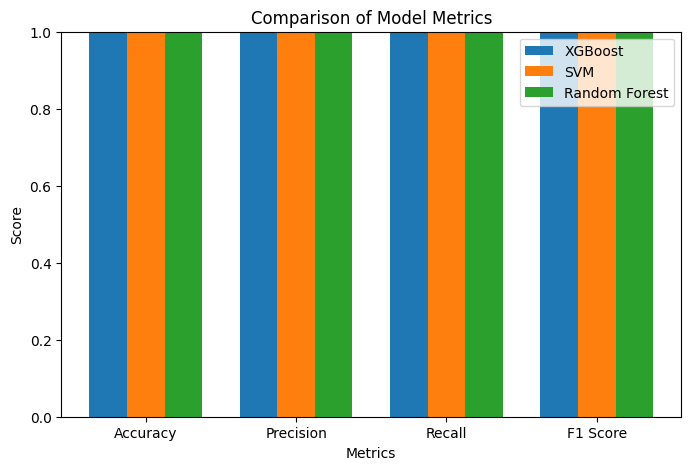

In [45]:
# Generate the bar chart for TF-IDF results
plot_model_metrics(model_metrics_tfidf)

### Predictions on the unseen Data

In [35]:
# Unseen text for prediction
unseen_text = ["This is a great product! I love it.", "I am not satisfied with the service."]

# Clean the unseen text
unseen_text_cleaned = [clean_text(text) for text in unseen_text]
unseen_text_cleaned = [text.lower() for text in unseen_text_cleaned]
unseen_text_cleaned = [remove_stopwords(text) for text in unseen_text_cleaned]
unseen_text_cleaned = [lemmatize_text(text) for text in unseen_text_cleaned]

In [36]:
# Convert the cleaned text to Bag of Words and TF-IDF features
X_unseen_bagofword = bow_vectorizer.transform(unseen_text_cleaned)  # BoW
X_unseen_tfidf = tfidf_vectorizer.transform(unseen_text_cleaned)  # TF-IDF

**Making Predictions on Unseen Data with BoW and TF-IDF**

In [37]:
# Make predictions using BoW
y_pred_unseen_xgb_bow = model_xgb_tfidf.predict(X_unseen_bagofword)
y_pred_unseen_svm_bow = model_svm_tfidf.predict(X_unseen_bagofword)
y_pred_unseen_rf_bow = model_rf_tfidf.predict(X_unseen_bagofword)

# Make predictions using TF-IDF
y_pred_unseen_xgb_tfidf = model_xgb_tfidf.predict(X_unseen_tfidf)
y_pred_unseen_svm_tfidf = model_svm_tfidf.predict(X_unseen_tfidf)
y_pred_unseen_rf_tfidf = model_rf_tfidf.predict(X_unseen_tfidf)

In [38]:
# Print the predictions
print("🔹 Predictions for Unseen Text:")
for i, text in enumerate(unseen_text):
    print(f"\n📌 Text: {text}")
    print(f"   ✅ XGBoost (BoW): {y_pred_unseen_xgb_bow[i]} | XGBoost (TF-IDF): {y_pred_unseen_xgb_tfidf[i]}")
    print(f"   ✅ SVM (BoW): {y_pred_unseen_svm_bow[i]} | SVM (TF-IDF): {y_pred_unseen_svm_tfidf[i]}")
    print(f"   ✅ Random Forest (BoW): {y_pred_unseen_rf_bow[i]} | Random Forest (TF-IDF): {y_pred_unseen_rf_tfidf[i]}")

🔹 Predictions for Unseen Text:

📌 Text: This is a great product! I love it.
   ✅ XGBoost (BoW): 1 | XGBoost (TF-IDF): 1
   ✅ SVM (BoW): 1 | SVM (TF-IDF): 1
   ✅ Random Forest (BoW): 1 | Random Forest (TF-IDF): 1

📌 Text: I am not satisfied with the service.
   ✅ XGBoost (BoW): 0 | XGBoost (TF-IDF): 0
   ✅ SVM (BoW): 1 | SVM (TF-IDF): 0
   ✅ Random Forest (BoW): 0 | Random Forest (TF-IDF): 0
